In [47]:
from gluoncv import data, utils
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
train_dataset = data.COCODetection(splits=['instances_train2017'])
val_dataset = data.COCODetection(splits=['instances_val2017'])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

  Using cached https://files.pythonhosted.org/packages/96/84/9a07b1095fd8555ba3f3d519517c8743c2554a245f9476e5e39869f948d2/pycocotools-2.0.0.tar.gz
  Stored in directory: /home/karim/.cache/pip/wheels/dc/e6/36/0e1ae88c868eb42d3f92181b1c9bbd0b217a7ec3da6bd62e55
Successfully built pycocotools


You should consider upgrading via the 'pip install --upgrade pip' command.


loading annotations into memory...
Done (t=26.24s)
creating index...
index created!
loading annotations into memory...
Done (t=0.63s)
creating index...
index created!
Num of training images: 117266
Num of validation images: 4952


Image size (height, width, RGB): (480, 640, 3)
Num of objects: 8
Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):
 [[  1.08 187.69 611.67 472.53]
 [311.73   4.31 630.01 231.99]
 [249.6  229.27 564.84 473.35]
 [  0.    13.51 433.48 387.63]
 [376.2   40.36 450.75  85.89]
 [465.78  38.97 522.85  84.64]
 [385.7   73.66 468.72 143.17]
 [364.05   2.49 457.81  72.56]]
Class IDs (num_boxes, ):
 [[45.]
 [45.]
 [50.]
 [45.]
 [49.]
 [49.]
 [49.]
 [49.]]


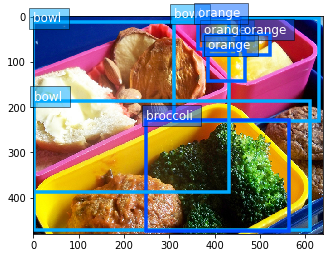

In [4]:
train_image, train_label = train_dataset[0]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print('Image size (height, width, RGB):', train_image.shape)
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):\n',
      bounding_boxes)
print('Class IDs (num_boxes, ):\n', class_ids)

utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
splt.show()

In [31]:
# extract only presence labels [exclude image segementation information]
labels_list = [labels[1][:,4:5].ravel() for labels in train_dataset]

In [32]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
binarized_labels = mlb.fit_transform(labels_list)

In [37]:
labels_names = train_dataset.index_map
import operator
sorted_labels_names = sorted(labels_names.items(), key=operator.itemgetter(1))
sorted_names = [label_name[0] for label_name in sorted_labels_names]

In [49]:
labels_df = pd.DataFrame(binarized_labels,columns=sorted_names)